# Load Dataset

In [50]:
file = open("/users/bajajvbh/Desktop/Vaibhav/Datasets/RHTDM.txt",mode='r')
Q = file.read()

# Remove New line chars

In [51]:
from re import sub
Q = sub("[\n]"," ",Q)
Q = sub("[^a-zA-Z0-9 ]","",Q)

# Unify Cases and tokenizing

In [52]:
Q = Q.upper().split(" ")

In [53]:
#Q

# Convert Data in 3->1 format

In [54]:
inp = []
op = []
for i in range(3,len(Q),1):
    w1 = Q[i-3]
    w2 = Q[i-2]
    w3 = Q[i-1]
    w4 = Q[i]
    inp.append(w1 + " " + w2 + " " + w3)
    op.append(w4)

# Create Dataframe for the same

In [55]:
import pandas as pd
Q1 = pd.DataFrame([inp,op]).T
Q1.columns=["inp","op"]

In [56]:
Q1.head()

,inp,op
0,SACH KEH RAHA,HAI
1,KEH RAHA HAI,DEEWANA
2,RAHA HAI DEEWANA,DIL
3,HAI DEEWANA DIL,DIL
4,DEEWANA DIL DIL,NA


# Define array for X

In [57]:
len(inp)

283

In [58]:
from numpy import unique
unique_words = list(unique(Q))
len(unique_words)

93

In [61]:
from numpy import zeros
X = zeros((283,93,3))

# Fill Data in blank array X

In [62]:
for line_no, line in enumerate(inp):
    for word_no,word in enumerate(line.split(" ")):
        X[line_no,unique_words.index(word),word_no] = 1

# Cross check("LAGAANA")

In [63]:
X[8,47,2]

1.0

In [64]:
unique_words.index("LAGAANA")

47

In [65]:
#inp

# Prepare Output

In [66]:
Y = zeros((283,93))
for line_no, word in enumerate(list(Q1.op)):
    Y[line_no,unique_words.index(word)]=1

In [67]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Verify

In [68]:
unique_words.index("RAHA")

73

In [69]:
Y[10,73]

1.0

In [73]:
unique_words

['',
 'AAH',
 'AAKE',
 'AB',
 'BADA',
 'BADI',
 'BAS',
 'BASI',
 'BATA',
 'BEHAKA',
 'BHAR',
 'BHOOLA',
 'BIN',
 'CHAAHA',
 'CHAAHOON',
 'CHAAHOONGA',
 'CHHODA',
 'CHHODAA',
 'DE',
 'DEEWANA',
 'DEKHA',
 'DIL',
 'DIN',
 'DOONGA',
 'DOOR',
 'EK',
 'HAI',
 'HAR',
 'HASEENA',
 'HUA',
 'JAA',
 'JEEVAN',
 'JHOOTHE',
 'JHOOTHI',
 'JISE',
 'JISSE',
 'KAMI',
 'KASMEIN',
 'KE',
 'KEH',
 'KHONE',
 'KI',
 'KISI',
 'KO',
 'KYOON',
 'LA',
 'LAGA',
 'LAGAANA',
 'LAI',
 'LALLA',
 'LAMHA',
 'LE',
 'MAIN',
 'MAINE',
 'MANN',
 'MAUSAM',
 'MEIN',
 'MERA',
 'MERE',
 'MERI',
 'MITA',
 'NA',
 'NASHE',
 'NAZRON',
 'NE',
 'NISHAAN',
 'OH',
 'PAAGAL',
 'PAL',
 'PATTHAR',
 'PIYE',
 'POOJA',
 'PYAAR',
 'RAHA',
 'SAARE',
 'SACH',
 'SE',
 'SUHAANA',
 'SUNDAR',
 'TANHA',
 'THA',
 'TO',
 'TODA',
 'US',
 'USKE',
 'USKI',
 'USSE',
 'USSI',
 'WADE',
 'WO',
 'WOH',
 'YAAR',
 'YAARON']

# Create LSTM model

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.layers.core import Activation

In [93]:
nn = Sequential()
nn.add(LSTM(100,input_shape=(93,3)))
nn.add(Dense(93))
nn.add(Activation("softmax"))

In [96]:
nn.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
model = nn.fit(X,Y,validation_split=0.2,epochs=40)

Epoch 1/40
8/8 [==============================] - 1s 186ms/step - loss: 4.1842 - accuracy: 0.0664 - val_loss: 7.1957 - val_accuracy: 0.0175
Epoch 2/40
8/8 [==============================] - 1s 85ms/step - loss: 4.1512 - accuracy: 0.0619 - val_loss: 7.3303 - val_accuracy: 0.0175
Epoch 3/40
8/8 [==============================] - 1s 73ms/step - loss: 4.1435 - accuracy: 0.0664 - val_loss: 7.4737 - val_accuracy: 0.0175
Epoch 4/40
8/8 [==============================] - 1s 73ms/step - loss: 4.1403 - accuracy: 0.0664 - val_loss: 7.5506 - val_accuracy: 0.0175
Epoch 5/40
8/8 [==============================] - 1s 75ms/step - loss: 4.1378 - accuracy: 0.0664 - val_loss: 7.7173 - val_accuracy: 0.0175
Epoch 6/40
8/8 [==============================] - 1s 83ms/step - loss: 4.1376 - accuracy: 0.0664 - val_loss: 7.7216 - val_accuracy: 0.0175
Epoch 7/40
8/8 [==============================] - 1s 72ms/step - loss: 4.1372 - accuracy: 0.0619 - val_loss: 7.6645 - val_accuracy: 0.0175
Epoch 8/40
8/8 [==========

In [99]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

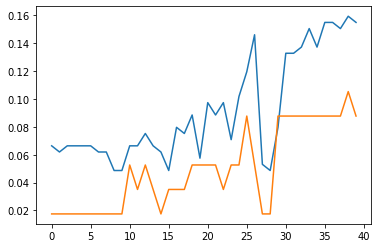

In [101]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot(val_acc)

# Testing

In [138]:
ip = input("Enter words(3) : ").upper()
ip = sub("[^a-zA-Z0-9 ]","",ip)
if(len(ip.split(" ")) != 3):
    print("Renter data(3 words only)")

Enter words(3) : Woh haseena badi


In [139]:
inp_X = zeros((1,93,3))
for word_no,word in enumerate(ip.split(" ")):
    inp_X[0,unique_words.index(word),word_no] = 1

prob = nn.predict(inp_X)
from numpy import argmax
unique_words[argmax(prob)]

'TODA'

        W = pd.DataFrame([unique_words,prob[0]]).T
        W.columns = ["Word","Prob"]
        W.sort_values(by="Prob",ascending=False)